In [4]:
import matplotlib as mp
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc as sm
import numpy as np
import math as m
import pandas as pd
from numpy.linalg import lstsq
from scipy.optimize import curve_fit, leastsq
from astropy.io import fits
import sklearn
from sklearn.cluster import KMeans
from scipy.interpolate import griddata

from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import SGDRegressor



from sklearn.model_selection import train_test_split





from scipy.optimize import curve_fit, leastsq # for optimizing datas and plots 
from scipy.optimize import fsolve  # this is for solving equations 
from scipy.interpolate import interp1d

In [5]:
X_train=np.load("input_train_maxnorm.npy")
y_train=np.loadtxt("y_train.dat")
y_test=np.loadtxt("y_test.dat")

In [6]:
X_test=np.load("input_test_maxnorm.npy")

In [7]:
X=np.array(list(X_train)+list(X_test))

ya=np.array(list(y_train)+list(y_test))


In [8]:
r=r.reshape(1, 120238)[0]

NameError: name 'r' is not defined

In [9]:
n, bins, patches = plt.hist(r, 1100, density=True, facecolor='g')

NameError: name 'r' is not defined

In [10]:
y=np.loadtxt("y_train.dat")

In [11]:
y=(ya/1000).astype(int)

In [12]:
y # classification for 1st class

array([1, 1, 1, ..., 4, 6, 4])

In [13]:
y2=(ya-(ya/1000).astype(int)*1000)

In [14]:
y_l=[]
y_r=[]
for i in range(0,len(ya)):
    x,y=int(str(ya[i])[:3]),float(str(ya[i])[3:])
    y_r.append(x)
    y_l.append(y)
    
y_r=np.array(y_r)
y_l=np.array(y_l)

def plot_mat(data):
   
    v=range(0,3000)
    # The normal figure
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    im = ax.imshow(data,cmap="coolwarm")

    for i in range(len(data)):
        for j in range(len(data)):
            text = ax.text(j, i, data[i, j],ha="center", va="center", color="w")
    im.set_clim(0,100.0)
    #fig.colorbar(im)
    plt.show()
    


In [15]:
y=y_r
len(np.unique(y))

85

## Simple SGDClassifier for Multiclass

In [16]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test= X[:158],X[158:],y[:158],y[158:]


sgd_clf = SGDRegressor(random_state=42)


LinregressResult(slope=0.9604804402587287, intercept=9.442954457392148, rvalue=0.9810090951183003, pvalue=4.972872766490765e-113, stderr=0.015204398932688695)

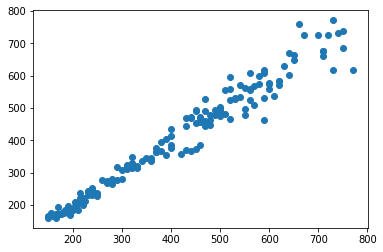

In [17]:
sgd_clf.fit(X_train, y_train)
y_train_pred=sgd_clf.predict(X_train)
y_test_pred=sgd_clf.predict(X_test)
plt.scatter(y_train,y_train_pred)
np.std(y_train-y_train_pred)
stats.linregress(y_train,y_train_pred)

In [161]:
from sklearn.model_selection import cross_val_score
#cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")


In [162]:
from sklearn.metrics import confusion_matrix
#confusion_matrix(y_train, y_train_pred)

In [163]:
#confusion_matrix(y_test, y_test_pred)

## Random Forest Classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
clf_rf=RandomForestClassifier()

In [20]:
clf_rf.fit(X_train,y_train)

/home/shrish/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

LinregressResult(slope=0.9984358335930694, intercept=0.4184527682027124, rvalue=0.999880013418439, pvalue=2.853577256630084e-284, stderr=0.0012384494455276226)

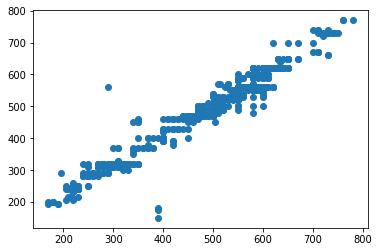

In [24]:
y_train_pred=clf_rf.predict(X_train)
y_test_pred=clf_rf.predict(X_test)

y_pred=clf_rf.predict(X)
np.std(y_test_pred-y_test)
plt.scatter(y_test,y_test_pred)
np.std(y_test-y_test_pred)

stats.linregress(y_train,y_train_pred)

In [22]:
#plot_mat(confusion_matrix(y_train, y_train_pred))

In [23]:
#confusion_matrix(y_test, y_test_pred)

In [118]:

#cross_val_score(clf_rf, X_train, y_train, cv=3, scoring="accuracy")


##  KNeighborsClassifier

In [25]:
from sklearn.neighbors import KNeighborsRegressor

In [26]:
clf_knn=KNeighborsRegressor()
clf_knn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [27]:
y_train_pred=clf_knn.predict(X_train)
y_test_pred=clf_knn.predict(X_test)

y_pred=clf_knn.predict(X)

LinregressResult(slope=0.9901816918965651, intercept=2.333572957889544, rvalue=0.9960258607225323, pvalue=9.126630380517733e-166, stderr=0.007089026534226044)

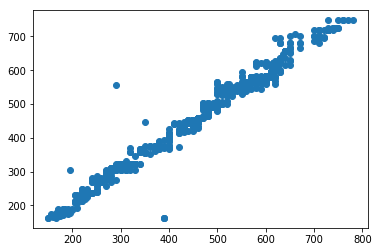

In [29]:
plt.scatter(y,y_pred)
np.std(y-y_pred)

stats.linregress(y_train,y_train_pred)

In [ ]:
#confusion_matrix(y_test, y_test_pred)

In [ ]:
#cross_val_score(clf_knn, X_train, y_train, cv=3, scoring="accuracy")

## DecisionTreeClassifier

In [167]:
from sklearn.tree import DecisionTreeRegressor

In [168]:
clf_dtc=DecisionTreeRegressor()
clf_dtc.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [169]:
y_train_pred=clf_dtc.predict(X_train)
y_test_pred=clf_dtc.predict(X_test)
y_pred=clf_dtc.predict(X)

np.std(y_test_pred-y_test),np.mean(y_test_pred-y_test),np.std(y_train_pred-y_train),np.mean(y_train_pred-y_train)


(25.125366633004713, 10.464705882352941, 0.0, 0.0)

23.383914556018034

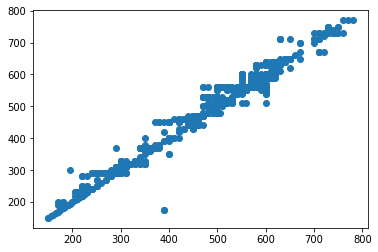

In [171]:
#confusion_matrix(y_train, y_train_pred)
plt.scatter(y,y_pred)
np.std(y-y_pred)

In [ ]:
confusion_matrix(y_test, y_test_pred)

## ANN

In [148]:
from sklearn.neural_network import MLPClassifier

In [149]:
clf_ann=MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(64, 64), random_state=1, max_iter=1000)
clf_ann.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(64, 64), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [150]:
y_train_pred=clf_ann.predict(X_train)
y_test_pred=clf_ann.predict(X_test)
y_pred=clf_ann.predict(X)
#clf_ann.predict_proba(X_test)
np.std(y_test_pred-y_test),np.mean(y_test_pred-y_test),np.std(y_train_pred-y_train),np.mean(y_train_pred-y_train)


(12.895255672567954,
 0.5445544554455446,
 5.119354622215018,
 0.043424317617866005)

[150 180 165 ... 480 600 470]


array([150, 155, 165, ..., 480, 600, 480])

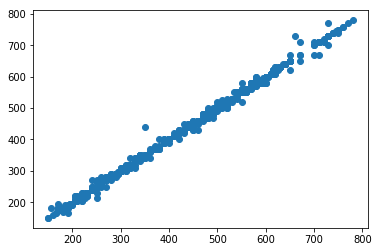

In [151]:
#confusion_matrix(y_train, y_train_pred)



np.std(y-y_pred)
def get_DxDy(centers,r_in): # getting DXDY
    data=[]
    for i in range(0,len(r_in)):
        value_chosen=r_in[i]
        x=min(centers, key = lambda x: abs(x-value_chosen))
        data.append(x) #0=x_in,
    return data


y_pred_r=np.array(get_DxDy(y,y_pred))
plt.scatter(y,y_pred_r)

print(y_pred_r)
y

In [152]:
from scipy import stats
stats.linregress(y,y_pred_r)
np.std(y-y_pred_r)

7.370182167600098

In [84]:
#confusion_matrix(y_test, y_test_pred)

In [82]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred, average="macro")

0.9976929812428309

## Using lebel binarizer

In [244]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
y_b_train = encoder.fit_transform(y_train)
y_b_test = encoder.fit_transform(y_test)
y_b_train

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [ ]:
#encoder.inverse_transform(y_b_test)
clb_ann=MLPClassifier()
clb_ann.fit(X_train,y_b_train)

In [ ]:
clf_rf_b=RandomForestClassifier()
clf_rf_b.fit(X_train,y_b_train)

In [ ]:
y_train_pred=clf_rf_b.predict(X_train)
y_test_pred=clf_rf_b.predict(X_test)
y_tr_p=encoder.inverse_transform(y_train_pred)
y_te_p=encoder.inverse_transform(y_test_pred)



y_train_preda=clb_ann.predict(X_train)
y_test_preda=clb_ann.predict(X_test)
y_tr_pa=encoder.inverse_transform(y_train_preda)
y_te_pa=encoder.inverse_transform(y_test_preda)

In [ ]:
confusion_matrix(y_train, y_tr_p)

In [ ]:
confusion_matrix(y_train, y_tr_pa)

In [ ]:
confusion_matrix(y_test, y_te_p)

In [ ]:
confusion_matrix(y_test, y_te_pa)

## SVM

In [135]:
from sklearn.svm import SVC

In [136]:
clf_svc=SVC(gamma=2, C=1)
clf_svc.fit(X_train,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=2, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [137]:
y_train_pred=clf_svc.predict(X_train)
y_test_pred=clf_svc.predict(X_test)

6.392841682649034

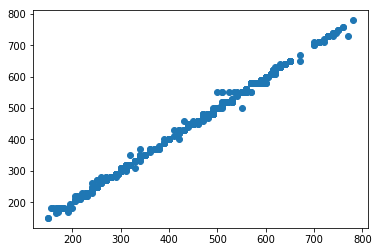

In [139]:
#confusion_matrix(y_train, y_train_pred)

plt.scatter(y_train,y_train_pred)
np.std(y_train-y_train_pred)

In [140]:
confusion_matrix(y_test, y_test_pred)

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]])

## Gaussian NB

In [143]:
from sklearn.naive_bayes import GaussianNB

In [144]:
clf_nb=GaussianNB()
clf_nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [145]:
y_train_pred=clf_nb.predict(X_train)
y_test_pred=clf_nb.predict(X_test)

In [146]:
confusion_matrix(y_test, y_test_pred)

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [147]:
data=confusion_matrix(y_train, y_train_pred)

In [245]:
def plot_mat(data):
   
    v=range(0,3000)
    # The normal figure
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    im = ax.imshow(data,cmap="coolwarm")

    for i in range(len(data)):
        for j in range(len(data)):
            text = ax.text(j, i, data[i, j],ha="center", va="center", color="w")
    im.set_clim(0,100.0)
    #fig.colorbar(im)
    plt.show()
    

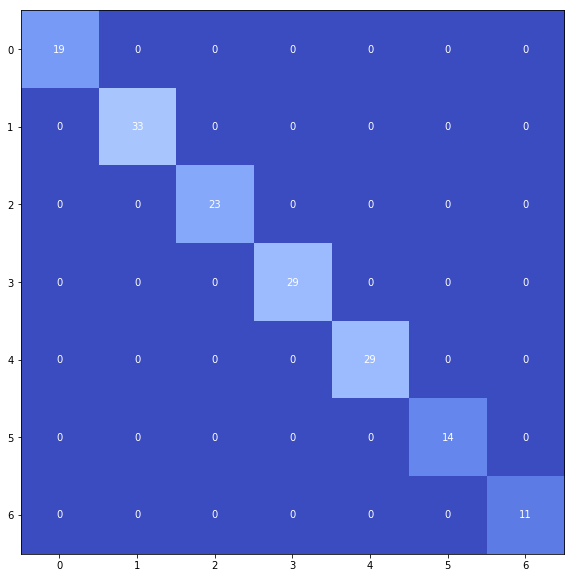

In [246]:
plot_mat(confusion_matrix(y_train, y_train_pred))

In [2]:
from scipy import stats

In [ ]:
stats.linregress(x,y)